In [1]:
import numpy as np
import matplotlib.pyplot as plt; plt.ion()
import os, cv2

In [2]:
#Better results with my data?
X1 = np.load("color_training_data/bin-blue.npy").astype(np.float64)/255
X2 = np.load("color_training_data/other-blue.npy").astype(np.float64)/255
X3 = np.load("color_training_data/red.npy").astype(np.float64)/255
X4 = np.load("color_training_data/green.npy").astype(np.float64)/255
X5 = np.load("color_training_data/black.npy").astype(np.float64)/255

In [3]:
X1 = np.delete(X1, 0, 0)
X2 = np.delete(X2, 0, 0)
X3 = np.delete(X3, 0, 0)
X4 = np.delete(X4, 0, 0)
X5 = np.delete(X5, 0, 0)

In [4]:
y1, y2, y3, y4, y5 = np.full(X1.shape[0],1), np.full(X2.shape[0], 2), \
                    np.full(X3.shape[0],3), np.full(X4.shape[0],4),np.full(X5.shape[0],5)

X, y = np.concatenate((X1,X2,X3, X4, X5)), np.concatenate((y1,y2,y3, y4, y5))

In [6]:
#Uses the pixel classifier in bin_detection folder for retraining
from pixel_classifier import PixelClassifier
multilogistic = PixelClassifier()
multilogistic.train(X, y, lr=0.0001, verbose=False)
weigths = multilogistic.get_weights()

[1 2 3 4 5]


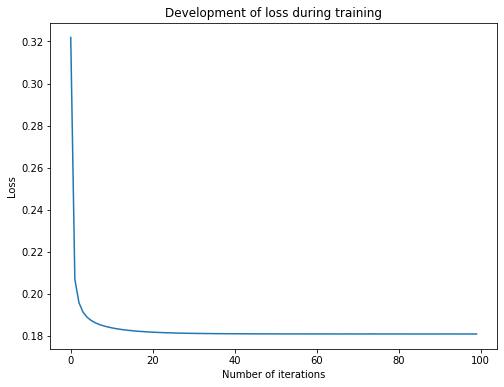

In [7]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(multilogistic.loss)), multilogistic.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

# Testing the segmentation output

In [8]:
from bin_detector import BinDetector
import numpy as np
import matplotlib.pyplot as plt; plt.ion()
import os, cv2

In [21]:
my_detector = BinDetector()
img = cv2.imread("data/validation/0064.jpg")
rows, cols, channels = img.shape
img_ = np.copy(img)
mask_img = my_detector.segment_image(img_)


[[361, 116, 457, 272]]


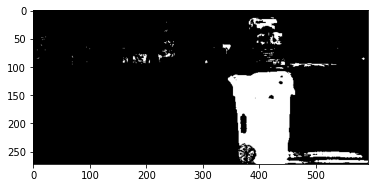

In [22]:
estm_boxes = my_detector.get_bounding_boxes(mask_img)
plt.imshow(mask_img, cmap='gray')
print(estm_boxes)

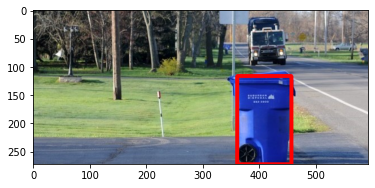

In [23]:
image =cv2.rectangle(cv2.cvtColor(img_, cv2.COLOR_BGR2RGB), 
                    (estm_boxes[0][0], estm_boxes[0][1]), (estm_boxes[0][2], estm_boxes[0][3]), (255,0,0), 5)
plt.imshow(image)